In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import random
random.seed(4682)

from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Kfold cv
from sklearn.model_selection import KFold

# Random forest
from sklearn.ensemble import RandomForestClassifier

# Importing xgboost and shap
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import fbeta_score

import seaborn as sns

/home/ramon/.local/lib/python3.6/site-packages/numba/core/errors.py:154: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


# Ionosfera

# Importing data

In [5]:
import os 
os.listdir('./data/mfeat')

['mfeat-fou', 'mfeat.info', 'mfeat.new']

In [13]:
with open('./data/mfeat/mfeat.info') as f:
    print(f.read())

The multi-feature digit dataset
-------------------------------

Oowned and donated by:
----------------------

Robert P.W. Duin
Department of Applied Physics 
Delft University of Technology 
P.O. Box 5046, 2600 GA Delft
The Netherlands

email: duin@ph.tn.tudelft.nl
http : //www.ph.tn.tudelft.nl/~duin
tel +31 15 2786143

Usage
-----
A slightly different version of the database is used in

M. van Breukelen, R.P.W. Duin, D.M.J. Tax, and J.E. den Hartog, Handwritten
     digit recognition by combined classifiers, Kybernetika, vol. 34, no. 4,
     1998, 381-386.

M. van Breukelen and R.P.W. Duin, Neural Network Initialization by Combined
     Classifiers, in: A.K. Jain, S. Venkatesh, B.C. Lovell (eds.), ICPR'98,
     Proc. 14th Int. Conference on Pattern Recognition (Brisbane, Aug. 16-20),

The database as it is is used in:

A.K. Jain, R.P.W. Duin, J. Mao, Statisitcal Pattern Recognition: A Review,
     in preparation

Description
-----------

This dataset consists of features of handwritt

In [23]:
df = pd.read_csv("data/mfeat/mfeat-fou", sep=' ', header=None)
df.dropna(axis='columns', inplace=True)
df.head()

,2,4,6,8,10,12,14,16,18,20,...,134,136,138,140,142,144,146,148,150,152
0,0.065882,0.197312,0.103826,0.270362,0.616078,0.035856,0.424572,0.089701,0.367773,0.037065,...,0.123448,0.113374,0.074343,0.281666,0.067795,0.344182,0.038963,0.394366,0.049971,0.344871
1,0.049142,0.175971,0.105515,0.227095,0.599280,0.041217,0.431078,0.096801,0.326739,0.059661,...,0.045310,0.069337,0.045386,0.254264,0.045447,0.335659,0.021719,0.445277,0.083978,0.354092
2,0.034172,0.227649,0.108766,0.127697,0.612494,0.056554,0.470639,0.041903,0.324267,0.044569,...,0.019858,0.218842,0.041087,0.360464,0.047154,0.377408,0.052099,0.445029,0.071234,0.261465
3,0.062336,0.217979,0.080243,0.289592,0.546316,0.045779,0.425545,0.022841,0.331454,0.119052,...,0.083995,0.085479,0.087658,0.151880,0.075950,0.293462,0.022675,0.408291,0.063010,0.401376
4,0.061970,0.198358,0.111239,0.253460,0.608455,0.023631,0.415246,0.091866,0.309310,0.049142,...,0.021004,0.106960,0.032283,0.248565,0.015674,0.386276,0.039481,0.434701,0.069218,0.405403


In [24]:
df.columns = np.arange(df.shape[1])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,0.065882,0.197312,0.103826,0.270362,0.616078,0.035856,0.424572,0.089701,0.367773,0.037065,...,0.123448,0.113374,0.074343,0.281666,0.067795,0.344182,0.038963,0.394366,0.049971,0.344871
1,0.049142,0.175971,0.105515,0.227095,0.599280,0.041217,0.431078,0.096801,0.326739,0.059661,...,0.045310,0.069337,0.045386,0.254264,0.045447,0.335659,0.021719,0.445277,0.083978,0.354092
2,0.034172,0.227649,0.108766,0.127697,0.612494,0.056554,0.470639,0.041903,0.324267,0.044569,...,0.019858,0.218842,0.041087,0.360464,0.047154,0.377408,0.052099,0.445029,0.071234,0.261465
3,0.062336,0.217979,0.080243,0.289592,0.546316,0.045779,0.425545,0.022841,0.331454,0.119052,...,0.083995,0.085479,0.087658,0.151880,0.075950,0.293462,0.022675,0.408291,0.063010,0.401376
4,0.061970,0.198358,0.111239,0.253460,0.608455,0.023631,0.415246,0.091866,0.309310,0.049142,...,0.021004,0.106960,0.032283,0.248565,0.015674,0.386276,0.039481,0.434701,0.069218,0.405403


In [25]:
df2 = pd.read_csv("data/mfeat/mfeat.new", sep=',', header=0)

In [26]:
df2.shape

(400, 76)

In [27]:
df2.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61',
       'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71',
       'V72', 'V73', 'V74', 'V75', 'V76'],
      dtype='object')

In [28]:
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76
0,0.065882,0.197312,0.103826,0.270362,0.616078,0.035856,0.424572,0.089701,0.367773,0.037065,...,0.123448,0.113374,0.074343,0.281666,0.067795,0.344182,0.038963,0.394366,0.049971,0.344871
1,0.049142,0.175971,0.105515,0.227095,0.599280,0.041217,0.431078,0.096801,0.326739,0.059661,...,0.045310,0.069337,0.045386,0.254264,0.045447,0.335659,0.021719,0.445277,0.083978,0.354092
2,0.034172,0.227649,0.108766,0.127697,0.612494,0.056554,0.470639,0.041903,0.324267,0.044569,...,0.019858,0.218842,0.041087,0.360464,0.047154,0.377408,0.052099,0.445029,0.071234,0.261465
3,0.062336,0.217979,0.080243,0.289592,0.546316,0.045779,0.425545,0.022841,0.331454,0.119052,...,0.083995,0.085479,0.087658,0.151880,0.075950,0.293462,0.022675,0.408291,0.063010,0.401376
4,0.061970,0.198358,0.111239,0.253460,0.608455,0.023631,0.415246,0.091866,0.309310,0.049142,...,0.021004,0.106960,0.032283,0.248565,0.015674,0.386276,0.039481,0.434701,0.069218,0.405403


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      400 non-null    float64
 1   V2      400 non-null    float64
 2   V3      400 non-null    float64
 3   V4      400 non-null    float64
 4   V5      400 non-null    float64
 5   V6      400 non-null    float64
 6   V7      400 non-null    float64
 7   V8      400 non-null    float64
 8   V9      400 non-null    float64
 9   V10     400 non-null    float64
 10  V11     400 non-null    float64
 11  V12     400 non-null    float64
 12  V13     400 non-null    float64
 13  V14     400 non-null    float64
 14  V15     400 non-null    float64
 15  V16     400 non-null    float64
 16  V17     400 non-null    float64
 17  V18     400 non-null    float64
 18  V19     400 non-null    float64
 19  V20     400 non-null    float64
 20  V21     400 non-null    float64
 21  V22     400 non-null    float64
 22  V2

In [7]:
df = pd.read_csv("data/ionosphere/dados.csv", sep=';', header=None)
df.rename(columns={34:"outcome"},inplace=True)
df.head()
df["outcome"] = df["outcome"].map({1:1.0, -1:0.0})
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,outcome
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1.0
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0.0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1.0
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0.0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1.0


In [8]:
df.shape

(351, 35)

In [9]:
df = df.dropna()

In [10]:
df.shape

(351, 35)

# Splitting data

In [11]:
# split data into train and test sets
seed = 7
test_size = 0.33
X = StandardScaler().fit_transform(df.drop('outcome', axis=1))
y = df['outcome'].values
#X_train, X_test, y_train, y_test = train_test_split(X, df.outcome, test_size=test_size, random_state=seed)

Features [1] are constant.
invalid value encountered in true_divide
Using 175 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Train Index:  [  0   1   2   4   8  12  13  14  20  21  26  27  28  29  32  34  35  36
  40  41  43  44  47  48  49  50  51  52  53  54  58  61  62  64  65  70
  71  74  80  83  85  87  88  89  91  95  98  99 100 102 103 105 106 107
 115 117 120 121 123 127 128 130 131 133 134 135 136 138 141 142 149 150
 151 154 156 159 160 161 162 164 166 169 170 171 174 178 184 186 187 188
 189 190 191 192 194 198 200 201 204 205 206 207 211 212 213 214 215 216
 217 218 221 226 229 230 235 236 237 241 243 246 247 251 252 255 256 257
 259 260 261 263 264 268 269 270 273 275 276 279 281 282 284 285 287 291
 292 293 299 300 301 303 304 306 308 309 312 313 314 317 318 319 320 321
 322 323 325 326 330 336 337 341 343 344 348 349 350] 

Test Index:  [  3   5   6   7   9  10  11  15  16  17  18  19  22  23  24  25  30  31
  33  37  38  39  42  45  46  55  56  57  59  60  63  66  67  68  69  72
  73  75  76  77  78  79  81  82  84  86  90  92  93  94  96  97 101 104
 108 109 110 111 112 113 114 116 118 119 

  0%|          | 0/176 [00:00<?, ?it/s]

Features [1] are constant.
invalid value encountered in true_divide
Using 176 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Train Index:  [  3   5   6   7   9  10  11  15  16  17  18  19  22  23  24  25  30  31
  33  37  38  39  42  45  46  55  56  57  59  60  63  66  67  68  69  72
  73  75  76  77  78  79  81  82  84  86  90  92  93  94  96  97 101 104
 108 109 110 111 112 113 114 116 118 119 122 124 125 126 129 132 137 139
 140 143 144 145 146 147 148 152 153 155 157 158 163 165 167 168 172 173
 175 176 177 179 180 181 182 183 185 193 195 196 197 199 202 203 208 209
 210 219 220 222 223 224 225 227 228 231 232 233 234 238 239 240 242 244
 245 248 249 250 253 254 258 262 265 266 267 271 272 274 277 278 280 283
 286 288 289 290 294 295 296 297 298 302 305 307 310 311 315 316 324 327
 328 329 331 332 333 334 335 338 339 340 342 345 346 347] 

Test Index:  [  0   1   2   4   8  12  13  14  20  21  26  27  28  29  32  34  35  36
  40  41  43  44  47  48  49  50  51  52  53  54  58  61  62  64  65  70
  71  74  80  83  85  87  88  89  91  95  98  99 100 102 103 105 106 107
 115 117 120 121 123 127 128 130 131 

  0%|          | 0/175 [00:00<?, ?it/s]

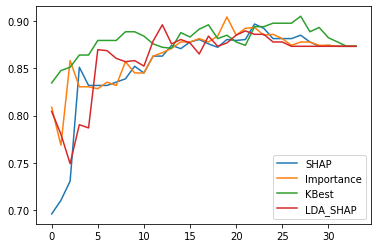

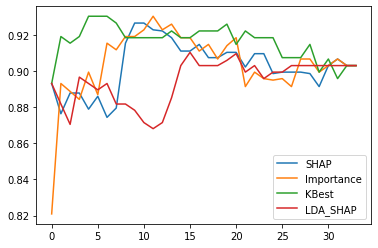

In [12]:
results = []

cv = KFold(n_splits=2, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    
    model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    
    
    # explain the model's predictions using SHAP
    # (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
    explainer = shap.TreeExplainer(model)

    shap_values = explainer.shap_values(X)

    features = df.columns[df.columns!='outcome']
    #df[features]

    # visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
    #shap.force_plot(explainer.expected_value[0], shap_values[0][0], df[features].iloc[0,:], feature_names=features)

    #shap.force_plot(explainer.expected_value[0], shap_values[0], df[features])

    #shap.summary_plot(shap_values[0], df[features])

    # shap.summary_plot(shap_values, df[features], plot_type="bar")

    mean_shap_values = np.mean(np.abs(shap_values[0]), axis=0)
    shap_df = pd.DataFrame(mean_shap_values, index=df[features].columns, columns=["SHAP"])
    shap_df.sort_values(by="SHAP", inplace=True, ascending=False)
    # shap_df.plot(kind="bar")
    
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
                 axis=0)

    indices = np.argsort(importances)[::-1]

    fi_df = pd.DataFrame(dict(zip(features[indices], importances[indices])), index=['Importance'])
    fi_df = fi_df.T
    # fi_df.head()
    # fi_df.plot(kind="bar")
    
    test = SelectKBest(score_func=f_classif, k=X_train.shape[1])
    fit = test.fit(X_train, y_train)
    # summarize scores
    set_printoptions(precision=3)
    # print(fit.scores_)

    kbest_dict = dict(zip(df.drop('outcome', axis=1).columns, fit.scores_))
    kbest_df = pd.DataFrame(kbest_dict, index=['KBest']).transpose()
    kbest_df.sort_values(by='KBest', ascending=False, inplace=True)
    # kbest_df.plot(kind="bar")
    
    # Transforming X from numpy to pandas to recover features
    X_train_df = pd.DataFrame(X_train, columns=df.drop(["outcome"], axis=1).columns)
    X_test_df = pd.DataFrame(X_test, columns=df.drop(["outcome"], axis=1).columns)

    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    lda.fit(X_train_df.values, y_train)
    y_pred = lda.predict(X_test_df)
    # use Kernel SHAP to explain test set predictions
    explainer = shap.KernelExplainer(lda.predict_proba, X_train_df, link="logit")
    shap_values = explainer.shap_values(X_test, nsamples=100)
    
    # plot the SHAP values for the Setosa output of the first instance
    # shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test_df.iloc[0,:], link="logit")

    lda_shap_df = pd.DataFrame(np.mean(np.abs(shap_values[0]), axis=0), index=X_train_df.columns, columns=["LDA_SHAP"])
    lda_shap_df.sort_values(by="LDA_SHAP", ascending=False, inplace=True)
    # lda_shap_df.head()
    # lda_shap_df.plot(kind="bar")
    
    fs_df = pd.DataFrame(list(zip(shap_df.index, fi_df.index, kbest_df.index, lda_shap_df.index)), columns=["SHAP", "Importance", "KBest", "LDA_SHAP"])
    fs_df.head()
    # Initializing dataframe for results
    LDA_scores = pd.DataFrame(index=range(fs_df.shape[0]), columns=fs_df.columns)
    # Filling in LDA scores
    for num_features in range(fs_df.shape[0]):
        fs_df.iloc[:num_features+1]
        for method in fs_df.columns:
            selected_features = fs_df.iloc[:num_features+1][method]
            lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
            y_pred = lda.fit(X_train_df[selected_features].values, y_train).predict(X_test_df[selected_features])
            LDA_scores.loc[num_features, method] = fbeta_score(y_test, y_pred, beta=1)
    
    results.append(LDA_scores)
    LDA_scores.plot()

Text(0.5, 1.0, 'Ionosphere Database')

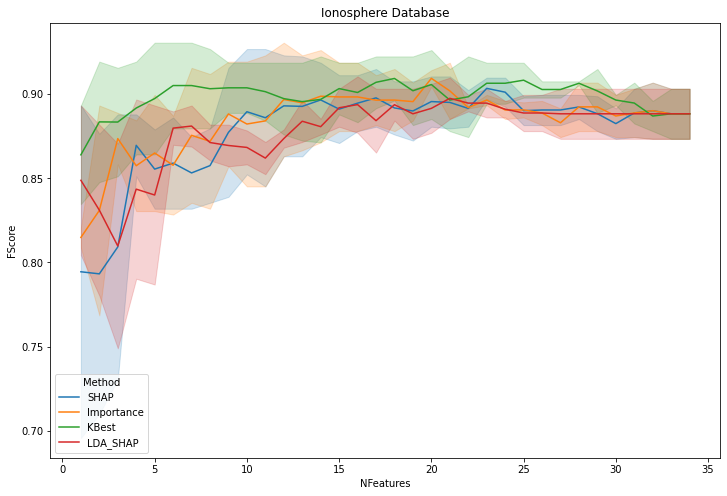

In [14]:
columns = results[0].columns
CV_LDA_scores = pd.DataFrame(columns=["FScore", "NFeatures", "Method", "Fold"])

for fold, lda_result in enumerate(results):
    for col in columns:
        test_df = pd.DataFrame({"FScore" : lda_result[col],
                                "NFeatures": np.arange(len(lda_result))+1,
                                "Method": [col]*len(lda_result),
                                "Fold": [fold]*len(lda_result)})
        CV_LDA_scores = pd.concat([CV_LDA_scores, test_df])
        
# Asserting data types
CV_LDA_scores.FScore = CV_LDA_scores.FScore.astype(float)
CV_LDA_scores.NFeatures = CV_LDA_scores.NFeatures.astype(int)
# Plot
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data=CV_LDA_scores, x="NFeatures", y="FScore", hue="Method").set_title('Ionosphere Database')